In [ ]:
'''
How to deal with imbalanced data

(1) Use the right evaluation metrics: 

    Applying inappropriate evaluation metrics for a model generated using imbalanced data can be dangerous. 
    Accuracy is not the metric to use when working with an imbalanced dataset. We have seen that it is misleading.

    There are metrics that have been designed to tell you a more truthful story when working with imbalanced classes.

    In the case of unbalanced datasets, other alternative evaluation metrics can be applied such as:

        Precision
        Recall
        F1 score
        AUC (also known as "roc_auc" in sklearn)
    
AND you can use one of the following (or none of them):
    
(2) Downsampling your data: (not always the best option)
    You can change the dataset that you use to build your predictive model to have more balanced data. See the code below.

(3) Use, when available, the parameter class_weight = 'balanced' of sklearn (not always the best option).
    
'''

In [1]:
#IMPORT DATA
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


target
0    500
1    268
dtype: int64


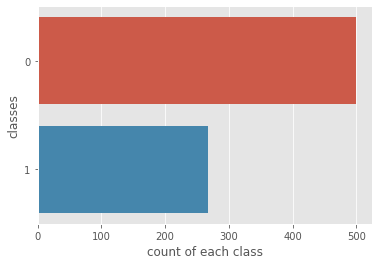

In [2]:
#Print class freq. through pandas 
print(df.groupby('target').size()) #"target" is the name of the target column, change it accordingly to your dataset

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

y=df['target']
y_pred=np.zeros(len(y))

accuracy_score(y, y_pred)


0.6510416666666666

In [4]:
df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

In [ ]:
df.describe()

## Downsampling

In [4]:
from sklearn.utils import resample

#Down-sample Majority Class
#1) Separate majority and minority classes
df_majority = df[df.target==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df[df.target==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=268,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df_downsampled.target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    268
0    268
Name: target, dtype: int64

## Oversampling

In [5]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = df[df.target==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df[df.target==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=500,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled.target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    500
0    500
Name: target, dtype: int64